# Random Forest

In [1]:
import pandas as pd
import numpy as np

In [23]:
train = pd.read_csv("../cleaned_data/train_clean.csv")
valid = pd.read_csv("../cleaned_data/validation_clean.csv")
test = pd.read_csv("../cleaned_data/test_clean.csv")

In [24]:
train

,student_id,tasks_use_model,academic_use_likelihood,suboptimal_frequency,suboptimal_example,reference_expectation,verify_frequency,verify_method,label,best_task_types_brainstorming_or_generating_creative_ideas,...,best_task_types_writing_or_debugging_code,best_task_types_writing_or_editing_essays_reports,suboptimal_task_types_brainstorming_or_generating_creative_ideas,suboptimal_task_types_converting_content_between_formats,suboptimal_task_types_data_processing_or_analysis,suboptimal_task_types_drafting_professional_text,suboptimal_task_types_explaining_complex_concepts_simply,suboptimal_task_types_math_computations,suboptimal_task_types_writing_or_debugging_code,suboptimal_task_types_writing_or_editing_essays_reports
0,1,"General purpose tasks, like translating text, ...",3,3.0,I find that [THIS MODEL] has too much watering...,1.0,4.0,I double check with google searches or find fo...,0,0,...,0,1,1,1,0,0,1,0,1,0
1,1,Coding,4,3.0,Many times when i try to get [THIS MODEL] to d...,1.0,5.0,I make sure that the code it writes is well wr...,1,0,...,1,0,1,0,0,1,1,1,0,0
2,1,"Math, coding sometimes",3,4.0,[THIS MODEL] likes to put a lot of words and e...,2.0,3.0,I make sure the facts its giving is correct. s...,2,0,...,0,0,1,0,1,1,0,0,0,0
3,2,"General first case go-to, catch-all type of m...",5,4.0,"Gave it the main ideas I wanted included, but...",3.0,2.0,Ask model to verify and doublecheck itself mu...,0,1,...,0,1,0,0,1,1,0,0,1,1
4,2,Coding/debugging Problem-solving Coming up ...,4,4.0,Explain a complex concept Just restated the ...,2.0,1.0,NaN,1,0,...,1,0,1,1,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,274,Mostly code writing.,3,2.0,"Often, when asking it to create simple scripts...",3.0,4.0,I mainly use this model to write code. When it...,1,0,...,1,0,0,0,1,0,0,1,0,0
572,274,Mostly for professional or creative writing.,2,3.0,If asking it to write an email or cover letter...,3.0,4.0,"I read any output produced line by line, befor...",2,1,...,0,1,0,0,0,1,0,0,0,1
573,275,I would use this model for philosophical quest...,5,3.0,"For simple debugging or troubleshooting, it te...",2.0,3.0,"If it is a computation question, I usually hav...",0,1,...,0,1,0,0,0,0,0,1,1,0
574,275,"Complex coding tasks, complicated logic or new...",2,4.0,I asked it to explain something about processe...,3.0,2.0,I would seek information from Google or a diff...,1,0,...,1,0,0,0,0,0,1,0,0,0


In [25]:
import re

text_cols = ["tasks_use_model", "suboptimal_example", "verify_method"]

def clean_text(s):
    # Convert input to string, handling NaNs, floats, etc.
    if s is None:
        s = ""
    s = str(s)  
    
    # Your original cleaning logic
    s = s.lower()
    s = re.sub(r"[^a-z0-9\s]", " ", s)
    s = re.sub(r"\s+", " ", s)
    return s.strip()

for col in text_cols:
    # Use .astype(str) on the column before applying for extra safety, 
    # or just use the improved clean_text function.
    train[col] = train[col].apply(clean_text) 
    valid[col] = valid[col].apply(clean_text)
    test[col] = test[col].apply(clean_text)

In [26]:
train

,student_id,tasks_use_model,academic_use_likelihood,suboptimal_frequency,suboptimal_example,reference_expectation,verify_frequency,verify_method,label,best_task_types_brainstorming_or_generating_creative_ideas,...,best_task_types_writing_or_debugging_code,best_task_types_writing_or_editing_essays_reports,suboptimal_task_types_brainstorming_or_generating_creative_ideas,suboptimal_task_types_converting_content_between_formats,suboptimal_task_types_data_processing_or_analysis,suboptimal_task_types_drafting_professional_text,suboptimal_task_types_explaining_complex_concepts_simply,suboptimal_task_types_math_computations,suboptimal_task_types_writing_or_debugging_code,suboptimal_task_types_writing_or_editing_essays_reports
0,1,general purpose tasks like translating text re...,3,3.0,i find that this model has too much watering d...,1.0,4.0,i double check with google searches or find fo...,0,0,...,0,1,1,1,0,0,1,0,1,0
1,1,coding,4,3.0,many times when i try to get this model to do ...,1.0,5.0,i make sure that the code it writes is well wr...,1,0,...,1,0,1,0,0,1,1,1,0,0
2,1,math coding sometimes,3,4.0,this model likes to put a lot of words and exp...,2.0,3.0,i make sure the facts its giving is correct sa...,2,0,...,0,0,1,0,1,1,0,0,0,0
3,2,general first case go to catch all type of mod...,5,4.0,gave it the main ideas i wanted included but r...,3.0,2.0,ask model to verify and doublecheck itself mul...,0,1,...,0,1,0,0,1,1,0,0,1,1
4,2,coding debugging problem solving coming up wit...,4,4.0,explain a complex concept just restated the co...,2.0,1.0,nan,1,0,...,1,0,1,1,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,274,mostly code writing,3,2.0,often when asking it to create simple scripts ...,3.0,4.0,i mainly use this model to write code when it ...,1,0,...,1,0,0,0,1,0,0,1,0,0
572,274,mostly for professional or creative writing,2,3.0,if asking it to write an email or cover letter...,3.0,4.0,i read any output produced line by line before...,2,1,...,0,1,0,0,0,1,0,0,0,1
573,275,i would use this model for philosophical quest...,5,3.0,for simple debugging or troubleshooting it ten...,2.0,3.0,if it is a computation question i usually have...,0,1,...,0,1,0,0,0,0,0,1,1,0
574,275,complex coding tasks complicated logic or new ...,2,4.0,i asked it to explain something about processe...,3.0,2.0,i would seek information from google or a diff...,1,0,...,1,0,0,0,0,0,1,0,0,0


# Test 1 Training a Random Forest without bag of words encoding of the full text vocab. Using the already processed one hot vector for certain keywords

In [32]:
train.columns

Index(['student_id', 'tasks_use_model', 'academic_use_likelihood',
       'suboptimal_frequency', 'suboptimal_example', 'reference_expectation',
       'verify_frequency', 'verify_method', 'label',
       'best_task_types_brainstorming_or_generating_creative_ideas',
       'best_task_types_converting_content_between_formats',
       'best_task_types_data_processing_or_analysis',
       'best_task_types_drafting_professional_text',
       'best_task_types_explaining_complex_concepts_simply',
       'best_task_types_math_computations',
       'best_task_types_writing_or_debugging_code',
       'best_task_types_writing_or_editing_essays_reports',
       'suboptimal_task_types_brainstorming_or_generating_creative_ideas',
       'suboptimal_task_types_converting_content_between_formats',
       'suboptimal_task_types_data_processing_or_analysis',
       'suboptimal_task_types_drafting_professional_text',
       'suboptimal_task_types_explaining_complex_concepts_simply',
       'suboptimal_t

In [58]:
train_data = np.stack([train['academic_use_likelihood'], 
                        train['suboptimal_frequency'], 
                        train['reference_expectation'],
                        train['verify_frequency'],
                        train['best_task_types_brainstorming_or_generating_creative_ideas'],
                        train['best_task_types_converting_content_between_formats'],
                        train['best_task_types_data_processing_or_analysis'],
                        train['best_task_types_drafting_professional_text'],
                        train['best_task_types_explaining_complex_concepts_simply'],
                        train['best_task_types_math_computations'],
                        train['best_task_types_writing_or_debugging_code'],
                        train['best_task_types_writing_or_editing_essays_reports'],
                        train['suboptimal_task_types_brainstorming_or_generating_creative_ideas'],
                        train['suboptimal_task_types_converting_content_between_formats'],
                        train['suboptimal_task_types_data_processing_or_analysis'],
                        train['suboptimal_task_types_drafting_professional_text'],
                        train['suboptimal_task_types_explaining_complex_concepts_simply'],
                        train['suboptimal_task_types_math_computations'],
                        train['suboptimal_task_types_writing_or_debugging_code'],
                        train['suboptimal_task_types_writing_or_editing_essays_reports']
                     ], axis = 1)

train_t = np.stack([train['label']], axis=1).reshape(-1)

In [59]:
valid_data = np.stack([valid['academic_use_likelihood'], 
                        valid['suboptimal_frequency'], 
                        valid['reference_expectation'],
                        valid['verify_frequency'],
                        valid['best_task_types_brainstorming_or_generating_creative_ideas'],
                        valid['best_task_types_converting_content_between_formats'],
                        valid['best_task_types_data_processing_or_analysis'],
                        valid['best_task_types_drafting_professional_text'],
                        valid['best_task_types_explaining_complex_concepts_simply'],
                        valid['best_task_types_math_computations'],
                        valid['best_task_types_writing_or_debugging_code'],
                        valid['best_task_types_writing_or_editing_essays_reports'],
                        valid['suboptimal_task_types_brainstorming_or_generating_creative_ideas'],
                        valid['suboptimal_task_types_converting_content_between_formats'],
                        valid['suboptimal_task_types_data_processing_or_analysis'],
                        valid['suboptimal_task_types_drafting_professional_text'],
                        valid['suboptimal_task_types_explaining_complex_concepts_simply'],
                        valid['suboptimal_task_types_math_computations'],
                        valid['suboptimal_task_types_writing_or_debugging_code'],
                        valid['suboptimal_task_types_writing_or_editing_essays_reports']
                     ], axis = 1)

valid_t = np.stack([valid['label']], axis=1).reshape(-1)

In [52]:
def estimate_variance(model, x_train, t_train, x_valid, t_valid, ntries=100, nsample=200):
    """
    Estimate the variance of a classifier on the NHANES data set.

    Parameters:
        `model` - an sklearn model supporting the methods fit(), 
                  predict(), and score()
        `ntries` - number of times to train the classifier to compute
                   the classifier's variance.
        `nsamples` - number of data points to sample to train each
                     classifier

    Returns: A tuple containing the average training error,
             average validation error, and variance estimate.
    """
    train_acc = []
    val_acc = []
    ys = []
    for i in range(ntries):
        subset = random.sample(range(x_train.shape[0]), nsample)
        model.fit(x_train[subset], t_train[subset])
        ys.append(model.predict(x_valid))
        train_acc.append(model.score(x_train[subset], t_train[subset]))
        val_acc.append(model.score(x_valid, t_valid))
    ys = np.stack(ys)
    variances = np.var(ys, axis=0) # TODO: Compute the variance of each row of ys, i.e., for 
                     #       each validation data point separate. (Why? Why can't
                     #       we compute the variance of the entire ys?)
    train_error = np.mean(train_acc) # TODO: the average training error across the ntries models
    val_error = np.mean(val_acc) # TODO: the average validation error across the ntries models
    return train_error, val_error, variances.mean()

In [46]:
import random

In [60]:
from sklearn.ensemble import RandomForestClassifier

forest_res = []
num_trees = [1, 2, 5, 10, 25, 50]
for n in num_trees:
    model = RandomForestClassifier(n_estimators=n)
    train_error, val_error, variance = estimate_variance(model, train_data, train_t, valid_data, valid_t,
                                                         ntries=10, nsample=50)
    forest_res.append([train_error, val_error, variance])

In [61]:
import matplotlib.pyplot as plt

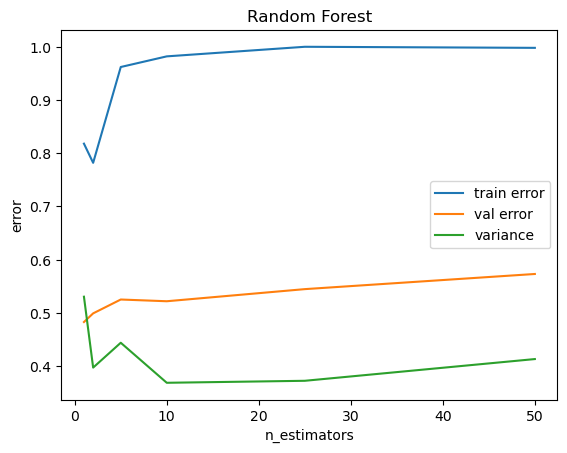

In [62]:
plt.title("Random Forest")
plt.plot(num_trees, [r[0] for r in forest_res], label="train error")
plt.plot(num_trees, [r[1] for r in forest_res], label="val error")
plt.plot(num_trees, [r[2] for r in forest_res], label="variance")
plt.ylabel("error")
plt.xlabel("n_estimators")
plt.legend()
plt.show()

In [50]:
model = RandomForestClassifier(n_estimators=50)
model.fit(train_data, train_t)
print("Training Accuracy:", model.score(train_data, train_t))
print("Validation Accuracy:", model.score(valid_data, valid_t))

Training Accuracy: 0.9809027777777778
Validation Accuracy: 0.6341463414634146


/Users/puravgupta/miniforge3/lib/python3.12/site-packages/sklearn/base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


# Test 2 Training a Random Forest with bag of words for the entire vocab of potential words

In [63]:
train.columns

Index(['student_id', 'tasks_use_model', 'academic_use_likelihood',
       'suboptimal_frequency', 'suboptimal_example', 'reference_expectation',
       'verify_frequency', 'verify_method', 'label',
       'best_task_types_brainstorming_or_generating_creative_ideas',
       'best_task_types_converting_content_between_formats',
       'best_task_types_data_processing_or_analysis',
       'best_task_types_drafting_professional_text',
       'best_task_types_explaining_complex_concepts_simply',
       'best_task_types_math_computations',
       'best_task_types_writing_or_debugging_code',
       'best_task_types_writing_or_editing_essays_reports',
       'suboptimal_task_types_brainstorming_or_generating_creative_ideas',
       'suboptimal_task_types_converting_content_between_formats',
       'suboptimal_task_types_data_processing_or_analysis',
       'suboptimal_task_types_drafting_professional_text',
       'suboptimal_task_types_explaining_complex_concepts_simply',
       'suboptimal_t

In [64]:
# Combine text columns into a single column because Naive Bayes works on a single text input
text_cols = ["tasks_use_model", "suboptimal_example", "verify_method"]

def combine_text(df):
    df["full_text"] = df[text_cols].fillna("").agg(" ".join, axis=1)
    return df

train = combine_text(train)
valid = combine_text(valid)
test = combine_text(test)

In [69]:
combined_text = train['full_text'] + test['full_text'] + valid['full_text']

In [70]:
full_corpus = combined_text.str.cat(sep=' ')

all_words = full_corpus.split()

vocab_vector = np.unique(all_words)

In [71]:
vocab_vector

array(['0', '00', '01', ..., 'your', 'youtube', 'zero'],
      shape=(2735,), dtype='<U23')

In [74]:
import numpy as np

def encode_text_to_bow(text_series, vocab_vector):
    """
    Converts a pandas Series of text into a raw Bag-of-Words count NumPy array
    based on a provided vocabulary.
    """
    
    # 1. Create a dictionary map for fast vocabulary lookup
    # This maps the word to its column index in the final matrix
    vocab_map = {word: i for i, word in enumerate(vocab_vector)}
    vocab_size = len(vocab_vector)
    num_documents = len(text_series)
    
    # Initialize the count matrix (BoW)
    # Using integer type for simple counts
    X_bow = np.zeros((num_documents, vocab_size), dtype=np.int32)
    
    # 2. Fill the BoW count matrix
    for doc_index, document in enumerate(text_series):
        # The text is assumed to be cleaned and lowercased already
        words = document.split()
        
        for word in words:
            if word in vocab_map:
                word_index = vocab_map[word]
                # Increment the count for this word in this document
                X_bow[doc_index, word_index] += 1
                
    return X_bow

# --- APPLICATION ---

# 1. Apply the function to your combined text columns
# (Assuming vocab_vector is ready from the previous step)
X_train_bow = encode_text_to_bow(train['full_text'], vocab_vector)
X_valid_bow = encode_text_to_bow(valid['full_text'], vocab_vector)
X_test_bow = encode_text_to_bow(test['full_text'], vocab_vector)

print(f"Shape of Training BoW Matrix: {X_train_bow.shape}")
print(f"Example of first row (document counts): {X_train_bow[0, :5]}")

Shape of Training BoW Matrix: (576, 2735)
Example of first row (document counts): [0 0 0 0 0]


In [93]:
train_encoded = pd.DataFrame([train['academic_use_likelihood'], 
                        train['suboptimal_frequency'], 
                        train['reference_expectation'],
                        train['verify_frequency']]).transpose()

valid_encoded = pd.DataFrame([valid['academic_use_likelihood'], 
                        valid['suboptimal_frequency'], 
                        valid['reference_expectation'],
                        valid['verify_frequency']]).transpose()

test_encoded = pd.DataFrame([test['academic_use_likelihood'], 
                        test['suboptimal_frequency'], 
                        test['reference_expectation'],
                        test['verify_frequency']]).transpose()

In [94]:
train_encoded = pd.concat([train_encoded, pd.DataFrame(X_train_bow)],ignore_index=True, sort=False, axis=1)

In [95]:
valid_encoded = pd.concat([valid_encoded, pd.DataFrame(X_valid_bow)],ignore_index=True, sort=False, axis=1)

In [96]:
test_encoded = pd.concat([test_encoded, pd.DataFrame(X_test_bow)],ignore_index=True, sort=False, axis=1)

In [97]:
train_encoded

,0,1,2,3,4,5,6,7,8,9,...,2729,2730,2731,2732,2733,2734,2735,2736,2737,2738
0,3.0,3.0,1.0,4.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4.0,3.0,1.0,5.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.0,4.0,2.0,3.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5.0,4.0,3.0,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.0,4.0,2.0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,3.0,2.0,3.0,4.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
572,2.0,3.0,3.0,4.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,2,0,0
573,5.0,3.0,2.0,3.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
574,2.0,4.0,3.0,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [99]:
train_encoded.to_numpy()

array([[3., 3., 1., ..., 0., 0., 0.],
       [4., 3., 1., ..., 0., 0., 0.],
       [3., 4., 2., ..., 0., 0., 0.],
       ...,
       [5., 3., 2., ..., 0., 0., 0.],
       [2., 4., 3., ..., 0., 0., 0.],
       [1., 2., 3., ..., 0., 0., 0.]], shape=(576, 2739))

In [98]:
train_t = np.stack([train['label']], axis=1).reshape(-1)
valid_t = np.stack([valid['label']], axis=1).reshape(-1)

In [103]:
def estimate_variance(model, x_train, t_train, x_valid, t_valid, ntries=100, nsample=200):
    """
    Estimate the variance of a classifier on the NHANES data set.

    Parameters:
        `model` - an sklearn model supporting the methods fit(), 
                  predict(), and score()
        `ntries` - number of times to train the classifier to compute
                   the classifier's variance.
        `nsamples` - number of data points to sample to train each
                     classifier

    Returns: A tuple containing the average training error,
             average validation error, and variance estimate.
    """
    train_acc = []
    val_acc = []
    ys = []
    for i in range(ntries):
        subset = random.sample(range(x_train.shape[0]), nsample)
        model.fit(x_train[subset], t_train[subset])
        ys.append(model.predict(x_valid))
        train_acc.append(model.score(x_train[subset], t_train[subset]))
        val_acc.append(model.score(x_valid, t_valid))
    ys = np.stack(ys)
    variances = np.var(ys, axis=0) # TODO: Compute the variance of each row of ys, i.e., for 
                     #       each validation data point separate. (Why? Why can't
                     #       we compute the variance of the entire ys?)
    train_error = np.mean(train_acc) # TODO: the average training error across the ntries models
    val_error = np.mean(val_acc) # TODO: the average validation error across the ntries models
    return train_error, val_error, variances.mean()

In [104]:
import random

In [105]:
from sklearn.ensemble import RandomForestClassifier

forest_res = []
num_trees = [1, 2, 5, 10, 25, 50]
for n in num_trees:
    model = RandomForestClassifier(n_estimators=n)
    train_error, val_error, variance = estimate_variance(model, train_encoded.to_numpy(), train_t, valid_encoded.to_numpy(), valid_t,
                                                         ntries=10, nsample=50)
    forest_res.append([train_error, val_error, variance])

In [106]:
import matplotlib.pyplot as plt

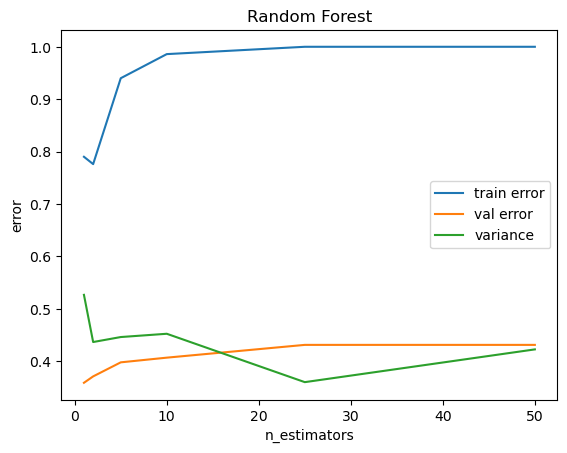

In [107]:
plt.title("Random Forest")
plt.plot(num_trees, [r[0] for r in forest_res], label="train error")
plt.plot(num_trees, [r[1] for r in forest_res], label="val error")
plt.plot(num_trees, [r[2] for r in forest_res], label="variance")
plt.ylabel("error")
plt.xlabel("n_estimators")
plt.legend()
plt.show()

In [109]:
model = RandomForestClassifier(n_estimators=50)
model.fit(train_encoded.to_numpy(), train_t)
print("Training Accuracy:", model.score(train_encoded.to_numpy(), train_t))
print("Validation Accuracy:", model.score(valid_encoded.to_numpy(), valid_t))

Training Accuracy: 0.9947916666666666
Validation Accuracy: 0.5853658536585366
